### feature explanations
id - Unique ID. We can use this features as a count for other parameters.

CustomerID - Customer ID is not a unique ID, there are few customer IDs which have more than 80 repetitive occurrences.

Surname - This is the surname of the customer, there are too many repititions. Actually there are only around 2700 unique surnames.

Credit Score - Your creditworthiness is rated by a three-digit figure called a credit score. 300 to 850 is the range of FICO scores. You have a better chance of getting approved for loans and better prices the higher your score. Now in our dataset there are range of values starting from 350 and going up to 850. Now this can be a very useful information while thinking about the churning.

Geography - There are 3 unique values - France, Spain, and Germany. One has to use Label Encoder or OneHotEncoder to encode these values.

Gender - There are only 2 unique values - Male and Female. Here a label binarizer is enough for the encoding purposes.

Age - Depicts the age of the customers. There are all possible values starting from 18 up to 92. There are 2 anomalies found in the age column - there 2 values in float - 32.44 and 36.44. It would be better if we can round those values to 32 and 36 respectively.

Tenure - It might show from how many years the customer has been related to the bank or may be vice versa. There are values ranging from 0 to 10. Most probably these values are in years.

Balance - This is the bank balance of the customer. There were many doubts in the discussion forum that the bank balance was 0. When I performed the analysis, I found that actually 89000+ people had 0 bank balance. While the maximum amount recorded was around 250,000.

Number of Products - Now this can be a very difficult question. While there are only 4 unique values possible - 1, 2, 3, and 4. This can be attributes to how many major/big products the customer owns. Or other explanation might be that how many products the customer has bought on loan.

Has Credit Card - Clear cut, whether the customer has a credit card or not. Same goes for the next column as well Is Active Member. **Joke - I have read in one of the famous investor's article - Credit card is actually for those people who do not need it. **

Estimated Salary - What is the estimated salary of the individual. Now, this is a very important aspect of the real life scenario. Whenever you are given a credit from the bank, they mostly ask for whether or not you are salaried. If you are estimated of getting a higher salary, easier for them to credit you a higher amount of loan.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [ ]:
df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

## Feature Engineering

In [ ]:
def age_tr(df):
    df["Age_Category"] = pd.cut(
        df["Age"],
        bins=[18, 30, 40, 50, 60, 100],
        labels=["18-30", "30-40", "40-50", "50-60", "60+"],
        include_lowest=True,
    )
    return df


df = age_tr(df)
test_df = age_tr(test_df)


def cred_score_tr(df):
    df["Credit_Score_Range"] = pd.cut(
        df["CreditScore"],
        bins=[0, 300, 600, 700, 800, 900],
        labels=["0-300", "300-600", "600-700", "700-800", "900+"],
    )
    return df


df = cred_score_tr(df)
test_df = cred_score_tr(test_df)


def salary_bin(df):
    df["EstimatedSalary_bin"] = pd.cut(df["EstimatedSalary"], 5)
    return df


df = salary_bin(df)
test_df = salary_bin(test_df)


def balance_bin(df):
    df["Balance_bin"] = pd.cut(df["Balance"], [-1, 100, 1000, 10000, 50000, 1000000])
    return df


df = balance_bin(df)
test_df = balance_bin(test_df)

In [ ]:
def balance_salary_ratio(df):
    df["Balance_Salary_Ratio"] = df["Balance"] / df["EstimatedSalary"]
    return df


def geo_gender(df):
    df["Geo_Gender"] = df["Geography"] + "_" + df["Gender"]
    return df


def total_product(df):
    df["Total_Product_Used"] = df["NumOfProducts"] + df["HasCrCard"]
    return df


def tp_gender(df):
    df["Tp_Gender"] = df["Total_Product_Used"].astype("str") + df["Gender"]
    return df


def zero_balance(df):
    df["Balance_is_zero"] = (df["Balance"] == 0).astype(int)
    return df


def freq_enc(df):
    freq = df["Surname"].value_counts(normalize=True)
    df["Surname"] = df["Surname"].map(freq)
    return df


df = balance_salary_ratio(df)
test_df = balance_salary_ratio(test_df)
df = geo_gender(df)
test_df = geo_gender(test_df)
df = total_product(df)
test_df = total_product(test_df)
df = tp_gender(df)
test_df = tp_gender(test_df)
df = zero_balance(df)
test_df = zero_balance(test_df)
df = freq_enc(df)
test_df = freq_enc(test_df)

In [ ]:
# Fit the LabelEncoder on the "Geography" column

encode_cols = [
    "Geography",
    "Age_Category",
    "Credit_Score_Range",
    "EstimatedSalary_bin",
    "Balance_bin",
    "Geo_Gender",
    "Tp_Gender",
]

df = pd.get_dummies(df, columns=encode_cols)
test_df = pd.get_dummies(test_df, columns=encode_cols)
df.replace({True: 1, False: 0}, inplace=True)
test_df.replace({True: 1, False: 0}, inplace=True)
df.replace({"Male": 1, "Female": 0}, inplace=True)
test_df.replace({"Male": 1, "Female": 0}, inplace=True)

# Fit the LabelEncoder on the "Gender" column
gender_encoder = LabelEncoder()
gender_encoder.fit(pd.concat([df["Gender"], test_df["Gender"]]))

# Transform the "Gender" column in the training and test data
df["Gender"] = gender_encoder.transform(df["Gender"])
test_df["Gender"] = gender_encoder.transform(test_df["Gender"])

## Preparing the data for modelling

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Drop the specified columns from test_df and df
columns_to_drop = ["id", "CustomerId", "Surname"]
test_df.drop(columns_to_drop, axis=1, inplace=True)
df.drop(columns_to_drop, axis=1, inplace=True)

KeyError: "['id', 'CustomerId', 'Surname'] not found in axis"

In [ ]:
sanitized_names = []
for col_name in df.columns:
    sanitized_name = (
        col_name.replace("[", "_")
        .replace("]", "_")
        .replace("(", "_")
        .replace(",", "_")
        .replace(" ", "_")
    )
    sanitized_names.append(sanitized_name)

df.columns = sanitized_names

In [54]:
sanitized_names = []
for col_name in test_df.columns:
    sanitized_name = (
        col_name.replace("[", "_")
        .replace("]", "_")
        .replace("(", "_")
        .replace(",", "_")
        .replace(" ", "_")
    )
    sanitized_names.append(sanitized_name)

test_df.columns = sanitized_names

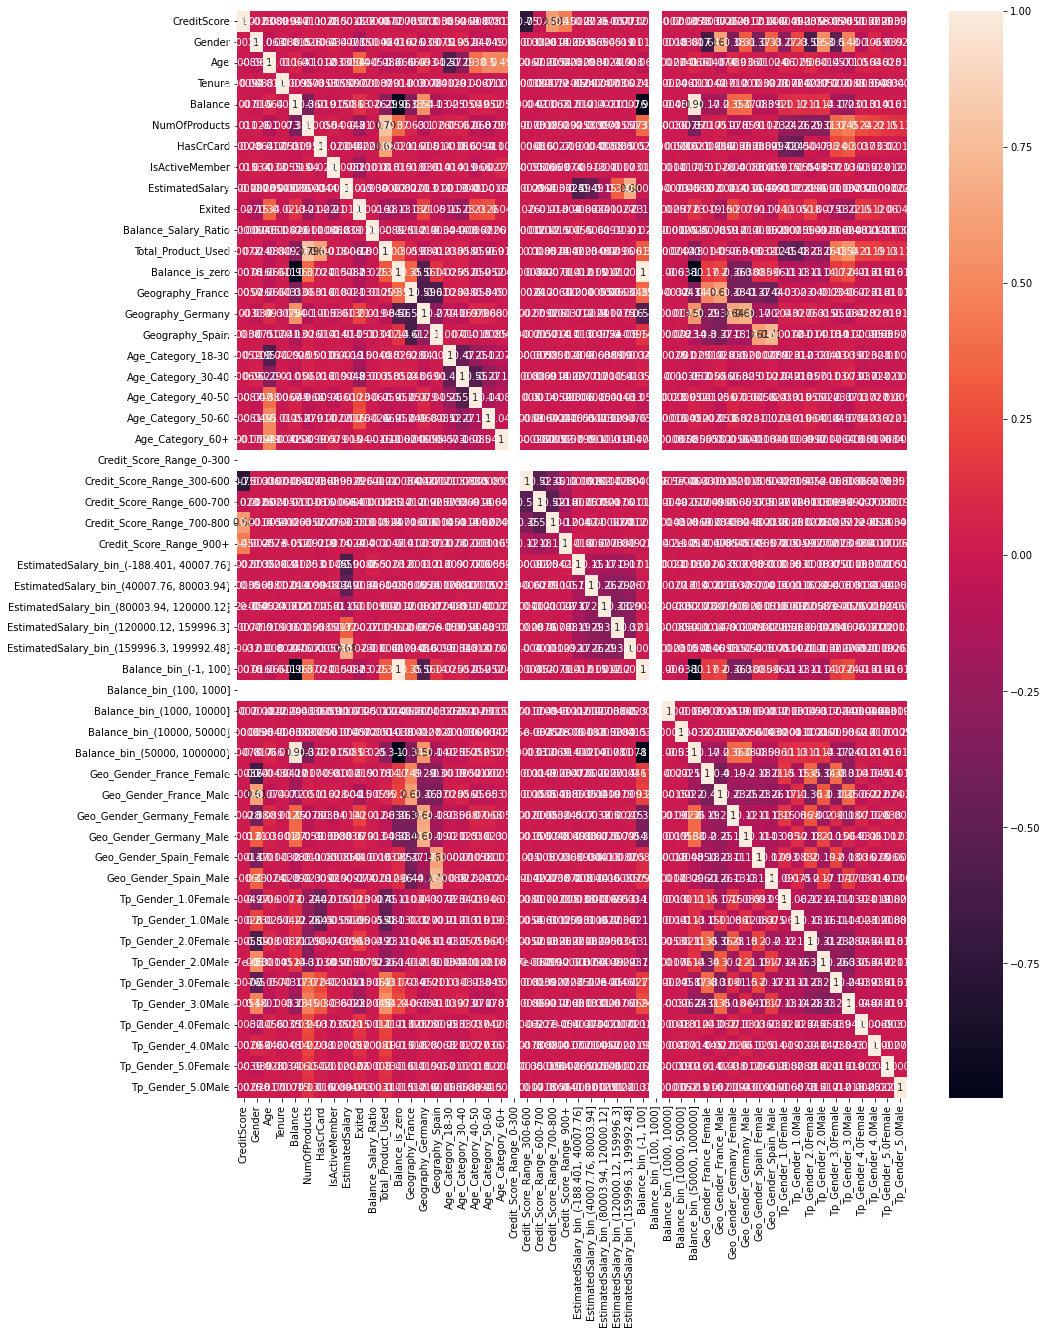

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = df.corr()

# Create a heatmap with annotations
plt.figure(figsize=(15, 20))
sns.heatmap(corr_matrix, annot=True)

# Display the heatmap
plt.show()

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Split the data into features and target variable
X = df.drop(
    "Exited", axis=1
)  # Replace 'Exited' with the actual name of your target variable column
y = df["Exited"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create the LightGBM classifier
model = lgb.LGBMClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and ROC score
accuracy = accuracy_score(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_pred)

accuracy, roc_score

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988


(0.8667555367043355, 0.7555997279344977)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Split the data into features and target variable
X = df.drop(
    "Exited", axis=1
)  # Replace 'Exited' with the actual name of your target variable column
y = df["Exited"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create the XGBoost classifier
model = xgb.XGBClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and ROC score
accuracy = accuracy_score(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_pred)

accuracy, roc_score

(0.8649377404792923, 0.7546589782333248)

In [39]:
pd.set_option("display.max_columns", 52)
pd.set_option("display.max_rows", 52)

In [46]:
df = df.astype(int)

In [69]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Concatenate train and test data
all_data = pd.concat([df, test_df], axis=1)

# Split the data into features and target variable
X = all_data.drop(
    "Exited", axis=1
)  # Replace 'Exited' with the actual name of your target variable column
y = all_data["Exited"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create the XGBoost classifier
model = xgb.XGBClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and ROC score
accuracy = accuracy_score(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_pred)

accuracy, roc_score

ValueError: feature_names must be unique. Duplicates found: ['Age', 'Age_Category_18-30', 'Age_Category_30-40', 'Age_Category_40-50', 'Age_Category_50-60', 'Age_Category_60+', 'Balance', 'Balance_Salary_Ratio', 'Balance_bin__-1__100_', 'Balance_bin__10000__50000_', 'Balance_bin__1000__10000_', 'Balance_bin__100__1000_', 'Balance_bin__50000__1000000_', 'Balance_is_zero', 'CreditScore', 'Credit_Score_Range_0-300', 'Credit_Score_Range_300-600', 'Credit_Score_Range_600-700', 'Credit_Score_Range_700-800', 'Credit_Score_Range_900+', 'EstimatedSalary', 'EstimatedSalary_bin__-188.401__40007.76_', 'EstimatedSalary_bin__120000.12__159996.3_', 'EstimatedSalary_bin__159996.3__199992.48_', 'EstimatedSalary_bin__40007.76__80003.94_', 'EstimatedSalary_bin__80003.94__120000.12_', 'Gender', 'Geo_Gender_France_Female', 'Geo_Gender_France_Male', 'Geo_Gender_Germany_Female', 'Geo_Gender_Germany_Male', 'Geo_Gender_Spain_Female', 'Geo_Gender_Spain_Male', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Tenure', 'Total_Product_Used', 'Tp_Gender_1.0Female', 'Tp_Gender_1.0Male', 'Tp_Gender_2.0Female', 'Tp_Gender_2.0Male', 'Tp_Gender_3.0Female', 'Tp_Gender_3.0Male', 'Tp_Gender_4.0Female', 'Tp_Gender_4.0Male', 'Tp_Gender_5.0Female', 'Tp_Gender_5.0Male']

In [74]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

# from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score  # Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold
from sklearn.metrics import precision_score, f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import VotingClassifier

import optuna


def objective_xgb(trial, trainX, trainy, cvfold):
    params = {
        "max_depth": trial.suggest_int("max_depth", 5, 10),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 1.0),
        "n_estimators": trial.suggest_int("n_estimators", 150, 1000),
        "subsample": trial.suggest_float("subsample", 0.01, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.01, 1.0),
        "random_state": trial.suggest_categorical("random_state", [42]),
        "tree_method": "hist",
        "device": "cuda",
        "eval_metric": "auc",
        "verbosity": 2,  # 0 for less output
    }

    xgb_model = xgb.XGBClassifier(**params)
    #     xgb_pipeline = make_pipeline(modelling_pipeline, xgb_model)

    cv = abs(
        cross_val_score(xgb_model, trainX, trainy, cv=cvfold, scoring="roc_auc").mean()
    )

    return cv


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

study = optuna.create_study(direction="maximize")
study.optimize(lambda trial: objective_xgb(trial, X, y, skf), n_trials=50)

best_params_xgb = study.best_params
print("Best Hyperparameters for XGBoost:", best_params_xgb)

In [75]:
# Replace 'model' with the name of your trained model
model = xgb.XGBClassifier(
    **{
        "max_depth": 6,
        "min_child_weight": 7,
        "learning_rate": 0.030590852062909457,
        "n_estimators": 502,
        "subsample": 0.5104530959636207,
        "colsample_bytree": 0.5688270771014503,
        "random_state": 42,
    }
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testdf
predictions = model.predict(X_test)

# Print the predictions
print(predictions)

from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test, predictions)
print("ROC Score:", roc_score)

[I 2024-01-14 06:17:48,561] A new study created in memory with name: no-name-7db87600-d5a9-4f0c-b81f-f223a9e77101
c:\Users\shyam\OneDrive\Documents\deeplearning\deep_learn\lib\site-packages\xgboost\core.py:160: UserWarning: [06:17:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
c:\Users\shyam\OneDrive\Documents\deeplearning\deep_learn\lib\site-packages\xgboost\core.py:160: UserWarning: [06:17:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
c:\Users\shyam\OneDrive\Documents\deeplearning\deep_learn\lib\site-packages\xgboost\core.py:160: UserWarning: [06:18:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-gr

KeyboardInterrupt: 

In [78]:
sample_sub = pd.read_csv("sample_submission.csv")
sample_sub.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [92]:
concat_df = pd.concat([sample_sub, pd.Series(predictions)], axis=1)
concat_df.drop("Exited", axis=1, inplace=True)
concat_df.to_csv("concat_df.csv", index=False)

In [91]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier

catboost_params = {
    "iterations": 647,
    "depth": 8,
    "min_data_in_leaf": 7,
    "learning_rate": 0.033379810549992034,
    "grow_policy": "Lossguide",
    "bootstrap_type": "Bernoulli",
    "eval_metric": "AUC",
}

cat_model = CatBoostClassifier(**catboost_params, random_state=42, verbose=0)


# Create the LGB model
lgbm_params = {
    "max_depth": 5,
    "min_child_samples": 8,
    "learning_rate": 0.06347017259496016,
    "n_estimators": 949,
    "subsample": 0.9501843568300399,
    "colsample_bytree": 0.2254380737407043,
    "reg_alpha": 0.4998470678294748,
    "reg_lambda": 0.834177205906492,
}

lgb_model = lgb.LGBMClassifier(**lgbm_params)


XGB_params = {
    "max_depth": 5,
    "min_child_weight": 3,
    "learning_rate": 0.012559330153550749,
    "n_estimators": 940,
    "subsample": 0.832434791172334,
    "colsample_bytree": 0.32371633846141523,
    "random_state": 42,
}
# Create the XGB model with the fine-tuned parameters
xgb_model = xgb.XGBClassifier(**XGB_params)

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[("xgb", xgb_model), ("lgb", lgb_model), ("cat", cat_model)],
    voting="soft",
    weights=[0.3, 0.5, 0.2],
)
# Fit the ensemble model on the training data
ensemble_model.fit(X, y)  # Replace X and y with your actual training data

# Make predictions on the test dataframe
predictions = ensemble_model.predict(
    test_df
)  # Replace test_df with your actual test dataframe

# Print the predictions
print(predictions)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 34921, number of negative: 130113
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1110
[LightGBM] [Info] Number of data points in the train set: 165034, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211599 -> initscore=-1.315315
[LightGBM] [Info] Start training from score -1.315315
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

In [ ]:
n_splits = 10
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_results = []

for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    ensemble_model.fit(X_train, y_train)

    y_pred_prob = ensemble_model.predict_proba(X_val)[:,1]
    y_pred = ensemble_model.predict(X_val)
    
    f1=  f1_score(y_val, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_val, y_pred_prob)
    print(f'Fold {fold}, AUC Score on Validation Set: {roc_auc}')
    print(f'Fold {fold}, F1 Score on Validation Set: {f1}')
    print('--------------------')

    cv_results.append(roc_auc)

average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage AUC-score across {n_splits} folds: {average_cv_result}')